# 4. Regression and Prediction

Perhaps the most common goal in statistics is to answer the question "Is the variable X (or more likely, X1,....Xp) associated with a variable Y, and if so, what is the relationship and can we use it to predict Y?

The process of training a model on data where the outcome is known _supervised learning_. Another important connection between data science and statistics is in the area of _anomaly detection_, where regression diagnostics originally intended for data analysis and improving the regression model can be used to detect unusual records.

#### Simple Linear Regression

Simple linear regression provides a model of the relationship between the magnitude of one variable and that of a second - for example, as X increases, Y also increases. or as X increases, Y decreases. Correlation is another way to measure how two variables are related. The difference is that while correlation measures the _strength_ of an association between two variables, regression quantifies the _nature_ of the relationship.

<table>
	<tr>
		<th>Term</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>Response</td>
		<td>The variable we are trying to predict (aka: dependent variable, Y variable, target, outcome)</td>
	</tr>
	<tr>
		<td>Independent variable</td>
		<td>The variable used to predict the response (aka: X variable, feature, attribute, predictor)</td>
	</tr>
	<tr>
		<td>Record</td>
		<td>The vector of predictor and outcome values for a specific individual or case</td>
	</tr>
	<tr>
		<td>Intercept</td>
		<td>The intercept of the regression line - that is, the predicted value when X=0</td>
	</tr>
	<tr>
		<td>Regression coefficient</td>
		<td>The slpe of the regression line</td>
	</tr>
	<tr>
		<td>Fitted values</td>
		<td>The estimates Yi, obtained from the regression line</td>
	</tr>
	<tr>
		<td>Residuals</td>
		<td>The difference between the observed values and the fitted values</td>
	</tr>
	<tr>
		<td>Least squares</td>
		<td>The method of fitting a regression by minimizing the sum of squared residuals</td>
	</tr>
</table>

#### The Regression Equation

Simple linear regression estimates how much Y will change when X changes by a certain amount. With correlation coefficient, the variables X and Y are interchangeable. With regression, we are trying to predict the Y variable from X using a linear relationship.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Consider the scatterplot below, displying the number of years a worker was exposed to cotton dust (Exposure) versus a measure of lung capacity (PEFR). How is PEFR related to Exposure? It's hard to tell based just on the picture.

In [6]:
df = pd.read_csv('https://github.com/gedeck/practical-statistics-for-data-scientists/raw/refs/heads/master/data/LungDisease.csv')

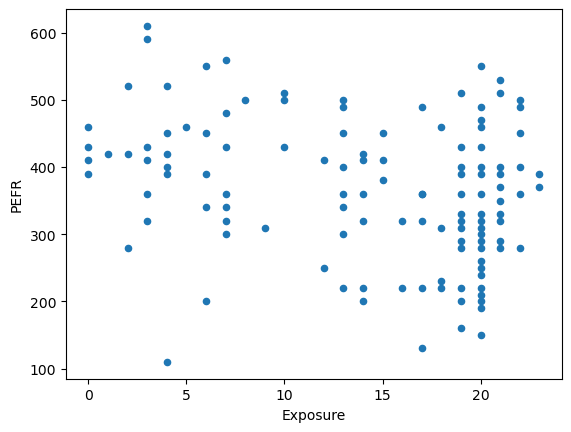

In [5]:
df.plot.scatter(x='Exposure', y='PEFR');

Simple linear regression tries to find the "best" line to predict the response PEFR as a function of the predictor variable Exposure.

In [8]:
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(df[predictors], df[outcome])

print(f'Intercept: {model.intercept_:3f}')
print(f'Coefficient Exposure: {model.coef_[0]:3f}')

Intercept: 424.582807
Coefficient Exposure: -4.184576


In [10]:
# With scikit-learn's LinearRegression model, we use the predict method on the training data to get
# the fitted values and subsequently the residuals. As we will see, this is a general pattern that
# all models in scikit-learn follow

fitted = model.predict(df[predictors])
residuals = df[outcome] - fitted

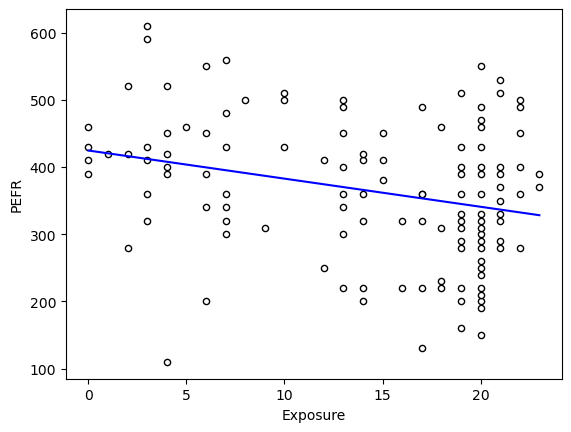

In [24]:
ax = df.plot.scatter(x='Exposure', y='PEFR', color='white', edgecolors='black')
plt.plot(df['Exposure'], fitted, color='blue')
plt.show()